# Example for the Answer Generator model

## Imports + model initialization

In [1]:
import time
import numpy as np
import pandas as pd
import tensorflow as tf

from models.qa import AnswerGenerator
from utils import set_display_options
from datasets import get_dataset, prepare_dataset, train_test_split, test_dataset_time

set_display_options()

model_name = 'bart_qa'
bert_base  = 'facebook/bart-large'

print("Tensorflow version : {}".format(tf.__version__))

Tensorflow version : 2.6.2


In [2]:
config = {
    'lang'             : 'en',
    'input_format'     : ['{question}', '{context}'],
    'output_format'    : '{answer}',
    'text_encoder'     : bert_base,
    'max_input_length' : 512,
    
    'pretrained' : bert_base
}

model = AnswerGenerator(nom = model_name, ** config)

print(model)

When using token / word-level tokenizer, it can be useful to add 'detach_punctuation' in cleaners


All model checkpoint layers were used when initializing TFBartForConditionalGeneration.

All the layers of TFBartForConditionalGeneration were initialized from the model checkpoint at facebook/bart-large.
If your task is similar to the task the model of the checkpoint was trained on, you can already use TFBartForConditionalGeneration for predictions without further training.
100%|██████████████████████████████████████████████████████████████████████████████████| 99/99 [00:21<00:00,  4.52it/s]


Weights transfered successfully !


100%|████████████████████████████████████████████████████████████████████████████████| 160/160 [00:32<00:00,  4.90it/s]


Weights transfered successfully !
Initializing model with kwargs : {'model': <custom_architectures.transformers_arch.bart_arch.Bart object at 0x0000023744A9B198>}
Initializing submodel : `model` !
Submodel model saved in pretrained_models\bart_qa\saving\model.json !
Model bart_qa initialized successfully !

========== bart_qa ==========
Sub model model
- Inputs 	: unknown
- Outputs 	: unknown
- Number of layers 	: 2
- Number of parameters 	: 406.342 Millions
- Model not compiled

Transfer-learning from : facebook/bart-large
Already trained on 0 epochs (0 steps)

- Language : en
- Vocabulary (size = 50265) : ['<s>', '<pad>', '</s>', '<unk>', '.', 'Ġthe', ',', 'Ġto', 'Ġand', 'Ġof', 'Ġa', 'Ġin', '-', 'Ġfor', 'Ġthat', 'Ġon', 'Ġis', 'âĢ', "'s", 'Ġwith', 'ĠThe', 'Ġwas', 'Ġ"', 'Ġat', 'Ġit', ...]
- Input format : ['{question}', '{context}']
- Output format : {answer}
- Max input length : 512



In [3]:
model.summary()


========== Summary of model ==========

Model: "bart"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
encoder (BartEncoder)        multiple                  203678720 
_________________________________________________________________
decoder (BartDecoder)        multiple                  254134361 
Total params: 406,341,721
Trainable params: 406,291,456
Non-trainable params: 50,265
_________________________________________________________________



## Model instanciation + dataset loading

In [2]:
model = AnswerGenerator(nom = model_name, max_to_keep = 1)

lr = {'name' : 'WarmupScheduler', 'maxval' : 5e-5,'minval' : 1e-5, 'factor' : 512, 'warmup_steps' : 8192}
lr = 1e-5

model.compile(optimizer = 'adam', optimizer_config = {'lr' : lr}, metrics = ['TextAccuracy', 'F1'])
print(model)

When using token / word-level tokenizer, it can be useful to add 'detach_punctuation' in cleaners
Model restoration...
Initializing submodel : `model` !
Successfully restored model from pretrained_models/bart_qa/saving/model.json !
Model bart_qa initialized successfully !
Optimizer 'model_optimizer' initilized successfully !
Submodel model compiled !
  Loss : {'reduction': 'none', 'name': 'TextLoss', 'pad_value': 1}
  Optimizer : {'name': 'Adam', 'learning_rate': 1e-05, 'decay': 0.0, 'beta_1': 0.9, 'beta_2': 0.999, 'epsilon': 1e-07, 'amsgrad': False}
  Metrics : [{'name': 'TextAccuracy', 'dtype': 'float32'}, {'name': 'F1', 'dtype': 'float32', 'normalize': True, 'exclude': None}]

========== bart_qa ==========
Sub model model
- Inputs 	: unknown
- Outputs 	: unknown
- Number of layers 	: 2
- Number of parameters 	: 406.342 Millions
- Optimizer 	: {'name': 'Adam', 'learning_rate': 1e-05, 'decay': 0.0, 'beta_1': 0.9, 'beta_2': 0.999, 'epsilon': 1e-07, 'amsgrad': False}
- Loss 	 : {'reduct

In [3]:
datasets = 'squad' if 'nq' not in model_name else 'nq'

dataset = get_dataset(datasets, clean_text = True, skip_impossible = True, keep_mode = 'longest')
train, valid = dataset['train'], dataset['valid']


print("Dataset length :\n  Training set : {}\n  Validation set : {}".format(
    len(train), len(valid)
))

Loading dataset squad...
Dataset length :
  Training set : 86821
  Validation set : 5928


## Training

In [4]:
epochs = 1
batch_size = 8 if datasets == 'squad' else 6
shuffle_size = batch_size * 32

max_input_length = 512
max_output_length = 128

print("Training samples   : {} - {} batches".format(len(train), len(train) // batch_size))
print("Validation samples : {} - {} batches".format(len(valid), len(valid) // (batch_size * 2)))

hist = model.train(
    train, validation_data = valid, 
    epochs = epochs, batch_size = batch_size, valid_batch_size = 2.,
    shuffle_size = shuffle_size, max_input_length = max_input_length, max_output_length = max_output_length
)

Training samples   : 132115 - 22019 batches
Validation samples : 4963 - 413 batches
Training config :
HParams :
- augment_prct	: 0.25
- max_input_length	: 512
- nb_mask	: 1
- min_mask_length	: 1
- max_mask_length	: 1
- max_output_length	: 128
- batch_size	: 6
- train_batch_size	: None
- valid_batch_size	: 2.0
- test_batch_size	: 1
- shuffle_size	: 192
- epochs	: 1
- verbose	: 1
- train_times	: 1
- valid_times	: 1
- train_size	: None
- valid_size	: None
- test_size	: 4
- pred_step	: -1

Running on 1 GPU

Epoch 1 / 1
   4263/Unknown - 3600s 836ms/step - loss: 0.7234 - EM: 0.3524 - F1: 0.6828 - precision: 0.7024 - recall: 0.6227 - accuracy: 0.8444 - sentence_accuracy: 0.3400
Saving after 1 hour training !
   8569/Unknown - 7209s 837ms/step - loss: 0.6285 - EM: 0.3801 - F1: 0.7168 - precision: 0.7331 - recall: 0.6586 - accuracy: 0.8600 - sentence_accuracy: 0.3677
Saving after 1 hour training !
  12864/Unknown - 10818s 838ms/step - loss: 0.5834 - EM: 0.3958 - F1: 0.7302 - precision: 0.7485 

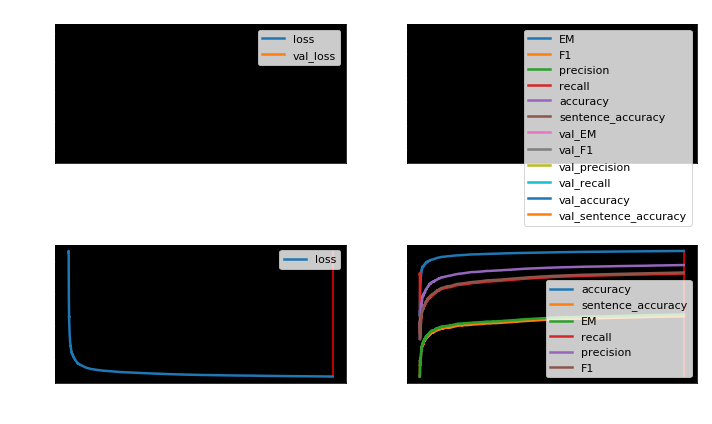

===== History =====
         EM       F1  accuracy      loss  precision    recall  sentence_accuracy   val_EM    val_F1  val_accuracy  \
0  0.438328  0.73518  0.887467  0.470677   0.787921  0.727874           0.425744  0.38391  0.755343      0.895131   

   val_loss  val_precision  val_recall  val_sentence_accuracy  
0  0.428246       0.813751    0.745407               0.372375  


In [5]:
model.plot_history()
print(model.history)

## Evaluate

In [ ]:
model.test(valid)

## Prediction

In [7]:
config = model.get_dataset_config(batch_size = 2, is_validation = False, shuffle_size = 0)
ds = prepare_dataset(valid.sample(10, random_state = 0), ** config)

for batch in ds.take(5):
    model.predict_with_target(batch, n_pred = 5)


Prediction 1 / 2 :
  Input      : <s>when does agents of shield season five start<\s>
  Target     : December 1, 2017<\s>
  Prediction : December 1, 2017<\s>
  Inference  : December 1, 2017Prediction 2 / 2 :
  Input      : <s>when will fairy tail final season be released<\s>
  Target     : 2018<\s>
  Prediction : 2018<\s>
  Inference  : 2018<\s>
Prediction 1 / 2 :
  Input      : <s>where is the table of contents found in a book<\s>
  Target     : usually appears after the title page, copyright notices, and, in technical journals, the abstract; and before any lists of tables or figures, the foreword, and the preface<\s>
  Prediction : after appears after the title page, copyright notices, and, in technical journals, the abstract<\s>
  Inference  : after the title page<\s>Prediction 2 / 2 :
  Input      : <s>who plays mr wilson in dennis the menace<\s>
  Target     : Joseph Sherrard Kearns<\s>
  Prediction : Joseph Sherrard Kearns<\s>
  Inference  : Joseph Sherrard Kearns<\s>
Prediction 

## Tests

In [5]:
config = model.get_dataset_config(batch_size = 16, is_validation = False, shuffle_size = 0)
ds = prepare_dataset(valid, ** config)

test_dataset_time(ds, steps = 100)

99it [00:02, 45.23it/s]


100 batchs in 2.193 sec sec (45.600 batch / sec)

Batch infos : 
Element 0 : 
 Element 0 : shape : (16, 488) - type : <dtype: 'int32'> - min : 0.000 - max : 50264.000
 Element 1 : shape : (16,) - type : <dtype: 'int32'> - min : 291.000 - max : 488.000
 Element 2 : shape : (16, 23) - type : <dtype: 'int32'> - min : 0.000 - max : 44733.000
 Element 3 : shape : (16,) - type : <dtype: 'int32'> - min : 2.000 - max : 23.000
Element 1 : 
 Element 0 : shape : (16, 1, 23) - type : <dtype: 'int32'> - min : 1.000 - max : 44733.000
 Element 1 : shape : (16, 1) - type : <dtype: 'int32'> - min : 2.000 - max : 23.000


2.1930015087127686

In [ ]:
from custom_train_objects.optimizers import WarmupScheduler

lr = WarmupScheduler(maxval = 1e-3, minval = 1e-4, factor = 256, warmup_steps = 4096)
lr.plot(25000)

In [ ]:
lr = model.get_optimizer().learning_rate
lr.assign(5e-4)

In [ ]:
lr = model.get_optimizer().learning_rate
print(lr)